In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors


### sigmoid function

In [2]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [3]:
# Sigmoid over set of values

values = [-4,-3.5,-3, -2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5, 3,3.5,4]
print([sigmoid(value) for value in values])

[0.01798620996209156, 0.02931223075135632, 0.04742587317756678, 0.07585818002124355, 0.11920292202211755, 0.18242552380635635, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8175744761936437, 0.8807970779778823, 0.9241418199787566, 0.9525741268224334, 0.9706877692486436, 0.9820137900379085]


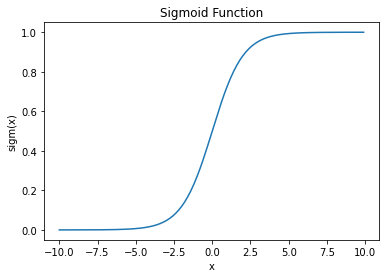

In [4]:
#Plot sigmoid function -10 to 10 with matplotlib
values = np.arange(-10, 10, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('x')
plt.ylabel('sigm(x)')
plt.title('Sigmoid Function')
plt.show()

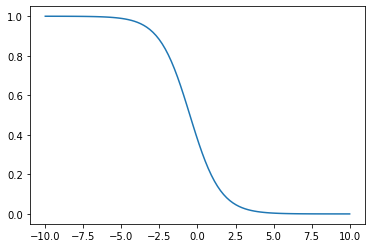

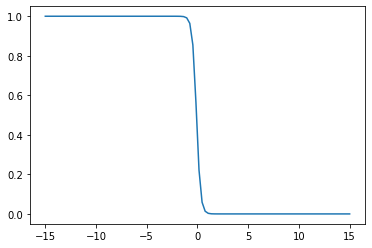

In [5]:
# sigmoid with weight and bias.

def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

sigmoid(1, 0.5, 0)

w = -1
b = -0.5  
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

w = -5
b = -0.5  
X = np.linspace(-15,15,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


SHAPE :  (100,) (100,) (100, 100) (100, 100)


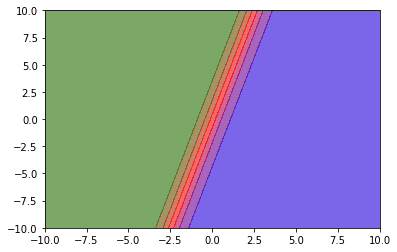

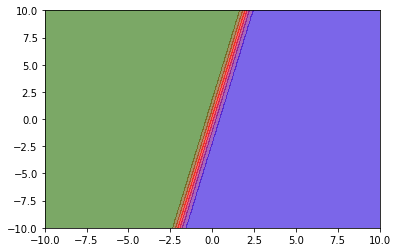

In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

sigmoid_2d(1, 0, 0.5, 0, 0)

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print("SHAPE : ", X1.shape, X2.shape, XX1.shape, XX2.shape)

w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","red","blue"])

plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()


# Observe changes.

w1 = 5
w2 = -1
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","red","blue"])

plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

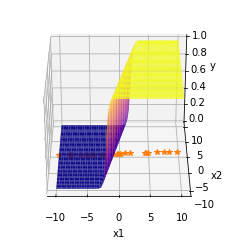

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='plasma')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 270)

# Compute Loss for a Given Dataset

w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

plt.plot(X, Y, '*')
plt.show()

### Loss Function

In [8]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

63 25
0.5 0.26


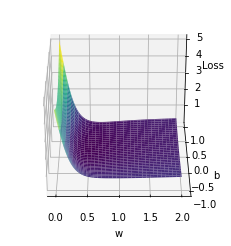

In [9]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

WW.shape

for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

print(i, j)

print(WW[i, j], BB[i, j])

In [10]:
# Class for Sigmoid Neuron

class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

In [11]:
# Fit for toy data - Points and their classes are given
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5], [4, 3], [-1, -4], [2, 2], [-2, 3]])
Y = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0]

sn = SigmoidNeuron()
sn.fit(X, Y, 5, 0.25, True)

In [12]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap='plasma', alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap='plasma')
  ax.plot()

[[0.77621974 0.48310026]] [-0.00240711]
[[ 0.99295849 -0.05993558]] [-0.01681999]
[[ 1.0303821  -0.32669771]] [-0.10759484]
[[ 1.19774798 -0.06923494]] [-0.20919106]
[[ 1.1934519  -0.39789765]] [-0.28407742]
[[ 1.34992981 -0.10719677]] [-0.36703681]
[[ 1.33130338 -0.43707528]] [-0.43818712]
[[ 1.46754831 -0.16584275]] [-0.50716545]
[[ 1.44902581 -0.45081272]] [-0.57461936]
[[ 1.56008861 -0.22839581]] [-0.63186576]
[[ 1.55122637 -0.44037003]] [-0.69123328]
[[ 1.63340202 -0.29005322]] [-0.73860853]
[[ 1.63918097 -0.41829697]] [-0.7878696]
[[ 1.69537772 -0.34222153]] [-0.82799336]
[[ 1.71404688 -0.40286844]] [-0.86861068]
[[ 1.75317984 -0.37802917]] [-0.90401414]
[[ 1.77851931 -0.40149158]] [-0.93863687]
[[ 1.80923522 -0.39951721]] [-0.97048378]
[[ 1.83586992 -0.40922103]] [-1.00098168]
[[ 1.86286155 -0.41362864]] [-1.02974043]
[[ 1.88845848 -0.41978261]] [-1.05714936]
[[ 1.91338504 -0.42507458]] [-1.08324389]
[[ 1.93746322 -0.43039023]] [-1.10816689]
[[ 1.96080289 -0.43548137]] [-1.13200

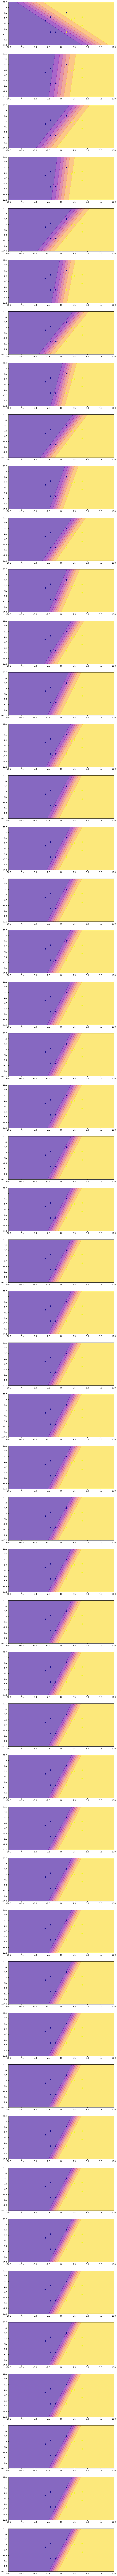

In [13]:
sn.fit(X, Y, 1, 0.05, True)

# Number of epoch
N = 50
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)
